In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

from main.utils.data_manage_utils import load_processed_data_by_folder, print_shapes, encode_cyclical, decode_cyclical

# Variables
ROOT_PATH = os.path.abspath("../../../")
DATA_FOLDER = os.path.join(ROOT_PATH, "data/preprocessing/base/reg")

X_train, y_train, X_test, y_test = load_processed_data_by_folder(DATA_FOLDER)
print_shapes(X_train, y_train, X_test, y_test)

train = X_train.copy()
train[y_train.name] = y_train
train

Shape of X_train: (263204, 45)
Shape of y_train: (263204,)
Shape of X_test: (65801, 45)
Shape of y_test: (65801,)


,MEDIAN_CARR_DELAY(MINS),MEDIAN_ORIGIN_DELAY(MINS),DEP_DELAY(MINS),CRS_ELAPSED_TIME(MINS),DISTANCE(KM),NR_PREV_ARR_FLIGHTS(1HR),ARR_DAY_SIN,ARR_DAY_COS,ARR_MIN_OF_DAY_SIN,ARR_MIN_OF_DAY_COS,...,EVENT_IC,EVENT_RA,EVENT_SN,EVENT_TS,08L/26R,08R/26L,09L/27R,09R/27L,10/28,ARR_DELAY_MINS
5998106,-11.0,-11.0,107,89,548.78494,74,-0.433884,-0.900969,-0.985556,0.169350,...,0,0,0,0,0.0,0.0,3.0,0.0,3.0,109
9744846,-11.0,-11.0,-3,106,830.41944,83,0.433884,-0.900969,0.496217,-0.868199,...,0,0,0,0,3.0,3.0,0.0,3.0,3.0,-5
8656393,-11.0,-9.0,64,98,653.39204,53,-0.781831,0.623490,-0.548293,-0.836286,...,0,3,0,2,0.0,3.0,0.0,0.0,3.0,46
7404998,-11.0,-8.0,-2,121,935.02654,88,-0.433884,-0.900969,-0.719340,0.694658,...,0,0,0,0,0.0,3.0,3.0,3.0,3.0,-19
8855927,-11.0,-5.0,15,132,1120.10064,74,0.433884,-0.900969,-0.845728,0.533615,...,0,0,2,0,3.0,0.0,3.0,0.0,3.0,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6033952,-6.0,-9.0,-3,126,975.26004,95,-0.781831,0.623490,0.678801,-0.734323,...,0,0,0,0,0.0,0.0,3.0,0.0,0.0,-15
7551519,-11.0,-15.0,-8,142,1200.56764,74,0.000000,1.000000,-0.649448,-0.760406,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,-33
7375452,-11.0,-8.0,-4,122,935.02654,58,0.433884,-0.900969,-0.999914,-0.013090,...,2,2,2,2,0.0,0.0,3.0,0.0,0.0,-1
7757994,-6.0,-8.0,180,92,584.19042,62,-0.781831,0.623490,-0.608761,0.793353,...,0,0,0,0,1.0,3.0,1.0,3.0,1.0,158


In [39]:
int_cols = ["MEDIAN_CARR_DELAY(MINS)","MEDIAN_ORIGIN_DELAY(MINS)","08L/26R","08R/26L","09L/27R", "09R/27L", "10/28"]
for col in train.columns:
    if col in int_cols:
        train[col] = train[col].astype(int)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263204 entries, 5998106 to 7249134
Data columns (total 46 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   MEDIAN_CARR_DELAY(MINS)       263204 non-null  int32  
 1   MEDIAN_ORIGIN_DELAY(MINS)     263204 non-null  int32  
 2   DEP_DELAY(MINS)               263204 non-null  int32  
 3   CRS_ELAPSED_TIME(MINS)        263204 non-null  int32  
 4   DISTANCE(KM)                  263204 non-null  float64
 5   NR_PREV_ARR_FLIGHTS(1HR)      263204 non-null  int64  
 6   ARR_DAY_SIN                   263204 non-null  float64
 7   ARR_DAY_COS                   263204 non-null  float64
 8   ARR_MIN_OF_DAY_SIN            263204 non-null  float64
 9   ARR_MIN_OF_DAY_COS            263204 non-null  float64
 10  NR_ENGINES                    263204 non-null  int32  
 11  APPROACH_SPEED(KMH)           263204 non-null  float64
 12  WINGSPAN(M)                   263204 

In [40]:
decoded = decode_cyclical(train, "ARR_DAY_SIN", "ARR_DAY_COS", 7)
encoded = encode_cyclical(decoded,"ARR_DAY",7)
decoded[train["ARR_DAY_COS"] - encoded["ARR_DAY_COS"] != 0]["ARR_DAY"]

Series([], Name: ARR_DAY, dtype: int32)

In [41]:
train = decode_cyclical(train, "ARR_DAY_SIN", "ARR_DAY_COS", 7)
train = decode_cyclical(train, "ARR_MIN_OF_DAY_SIN", "ARR_MIN_OF_DAY_COS", 24*60)
train

,MEDIAN_CARR_DELAY(MINS),MEDIAN_ORIGIN_DELAY(MINS),DEP_DELAY(MINS),CRS_ELAPSED_TIME(MINS),DISTANCE(KM),NR_PREV_ARR_FLIGHTS(1HR),ARR_DAY,ARR_MIN_OF_DAY,NR_ENGINES,APPROACH_SPEED(KMH),...,EVENT_IC,EVENT_RA,EVENT_SN,EVENT_TS,08L/26R,08R/26L,09L/27R,09R/27L,10/28,ARR_DELAY_MINS
5998106,-11,-11,107,89,548.78494,74,4,1119,2,255.576,...,0,0,0,0,0,0,3,0,3,109
9744846,-11,-11,-3,106,830.41944,83,3,601,2,255.576,...,0,0,0,0,3,3,0,3,3,-5
8656393,-11,-9,64,98,653.39204,53,6,853,2,255.576,...,0,3,0,2,0,3,0,0,3,46
7404998,-11,-8,-2,121,935.02654,88,4,1256,2,261.132,...,0,0,0,0,0,3,3,3,3,-19
8855927,-11,-5,15,132,1120.10064,74,3,1209,2,257.428,...,0,0,2,0,3,0,3,0,3,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6033952,-6,-9,-3,126,975.26004,95,6,549,2,229.648,...,0,0,0,0,0,0,3,0,0,-15
7551519,-11,-15,-8,142,1200.56764,74,0,882,2,257.428,...,0,0,0,0,0,0,0,0,3,-33
7375452,-11,-8,-4,122,935.02654,58,3,1077,2,264.836,...,2,2,2,2,0,0,3,0,0,-1
7757994,-6,-8,180,92,584.19042,62,6,1290,2,259.280,...,0,0,0,0,1,3,1,3,1,158


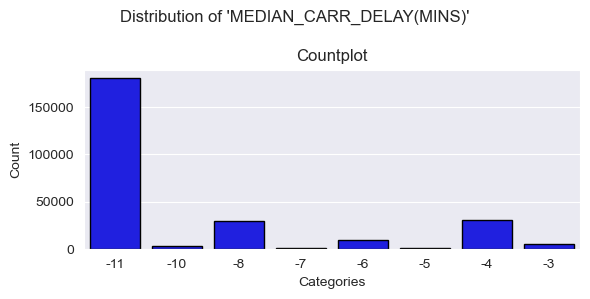

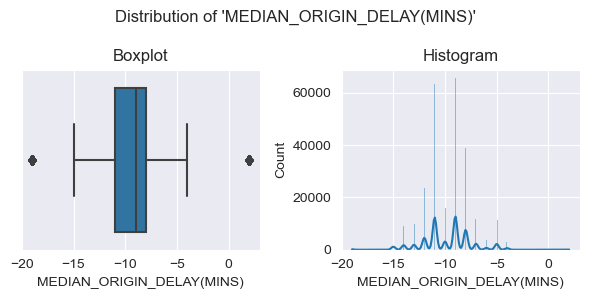

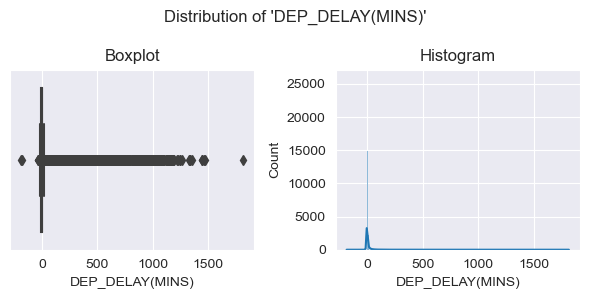

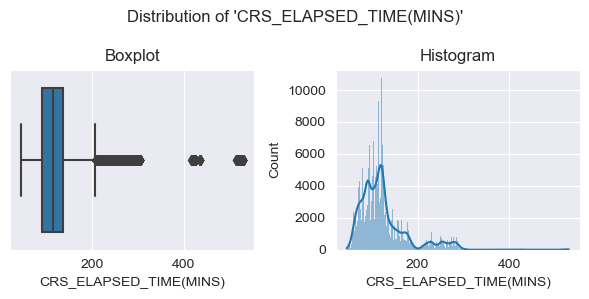

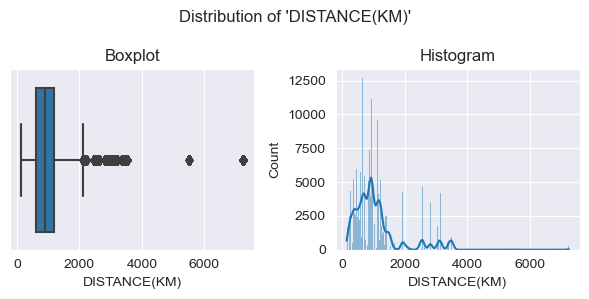

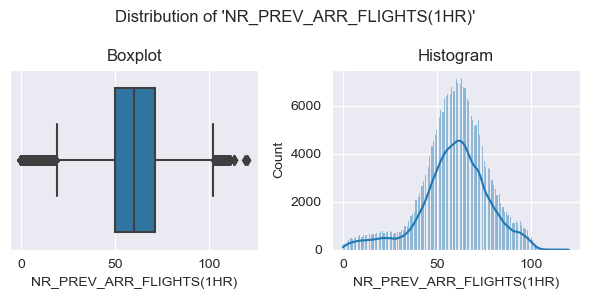

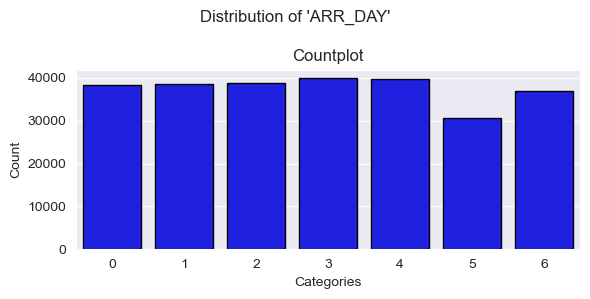

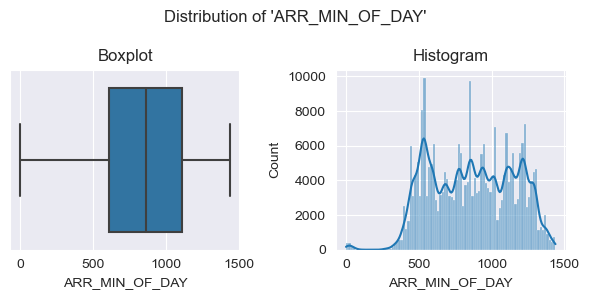

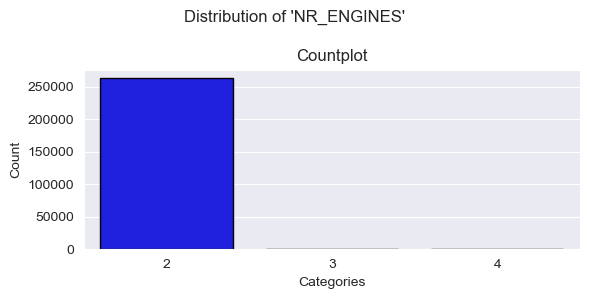

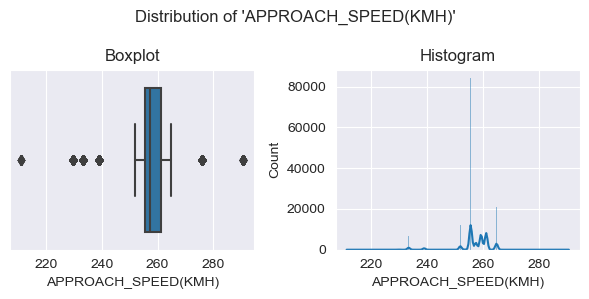

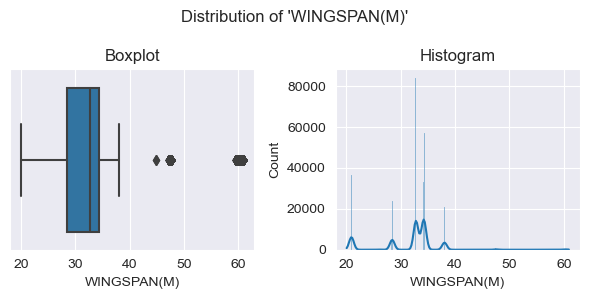

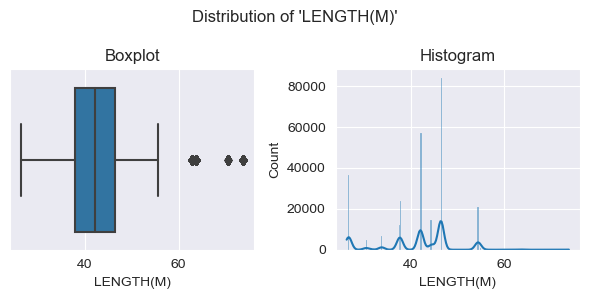

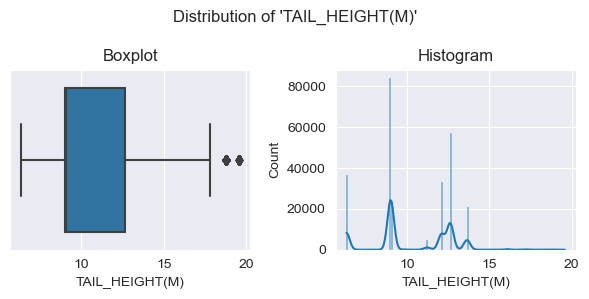

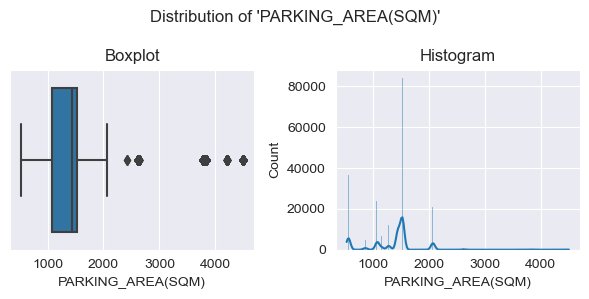

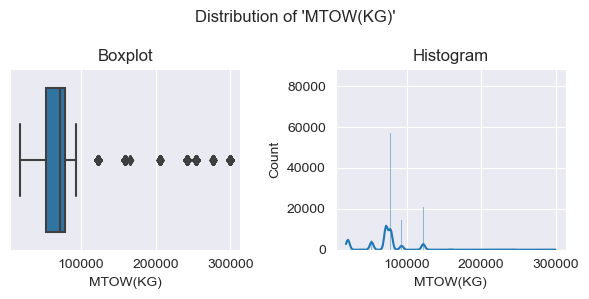

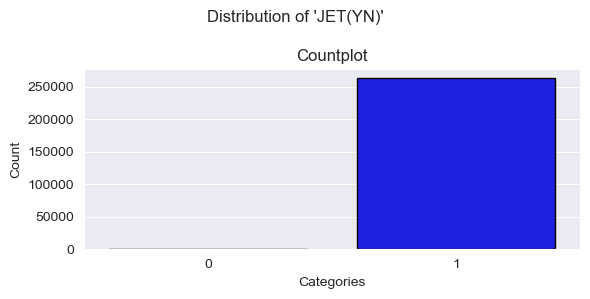

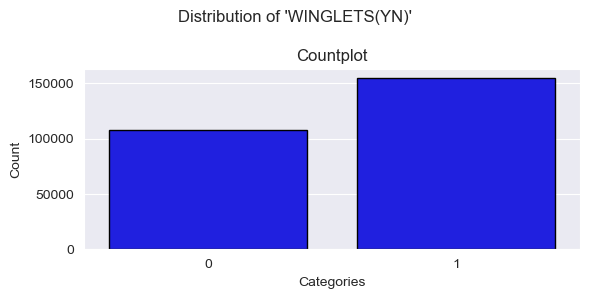

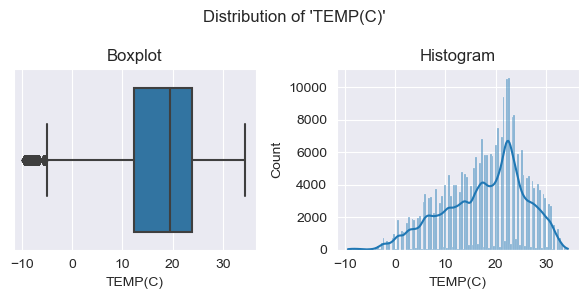

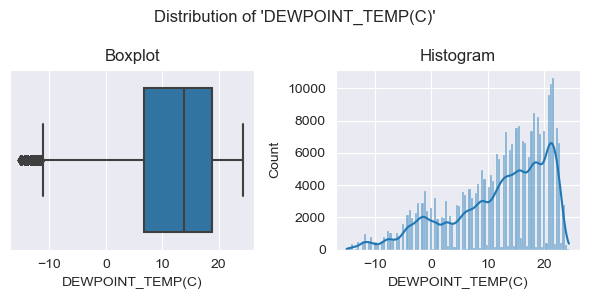

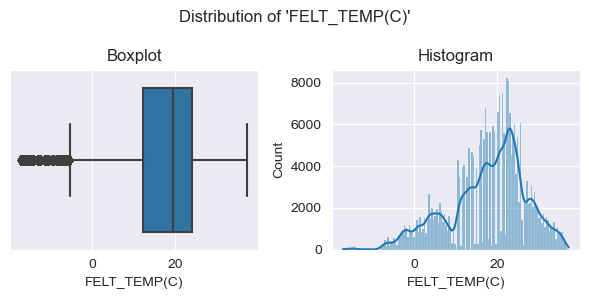

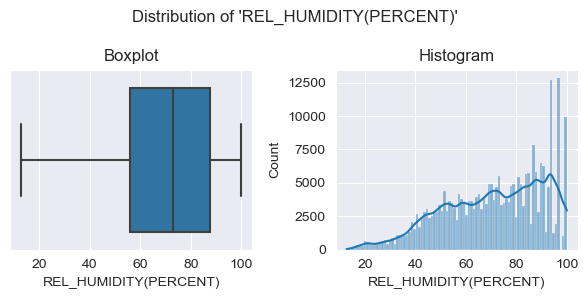

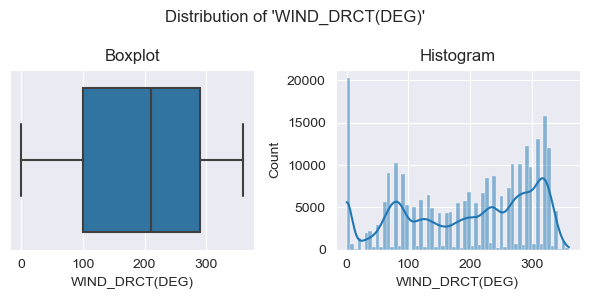

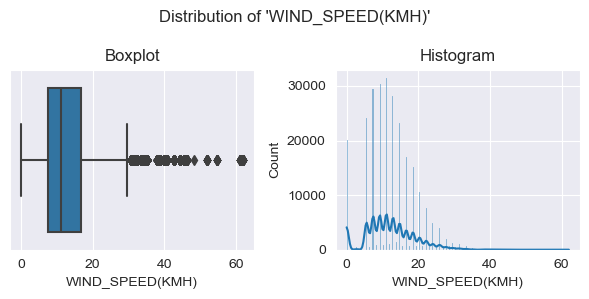

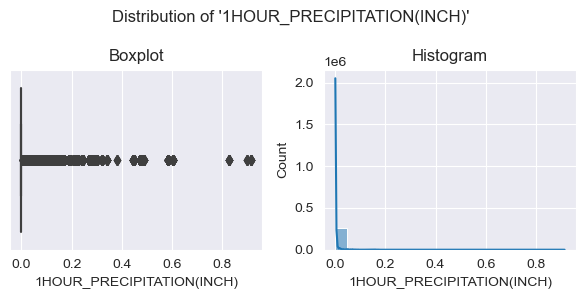

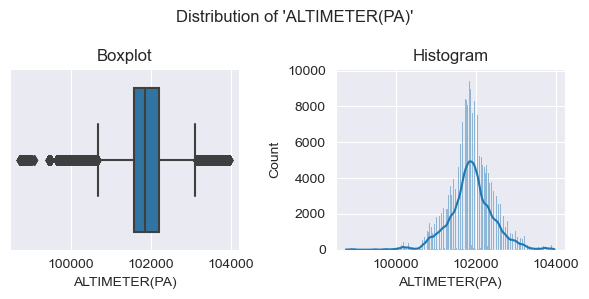

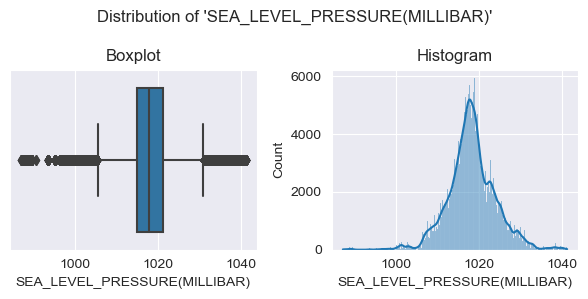

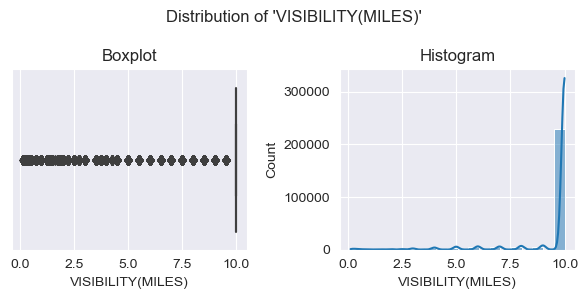

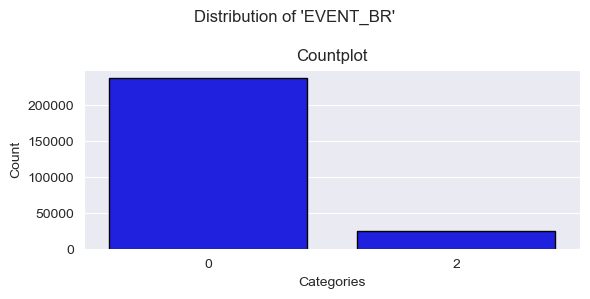

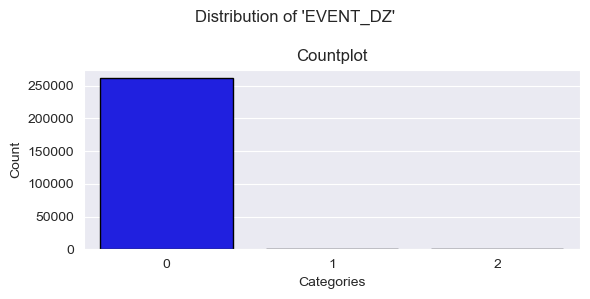

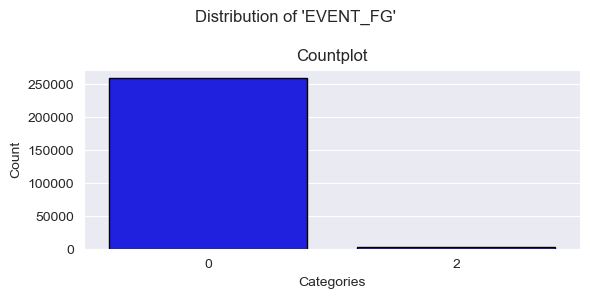

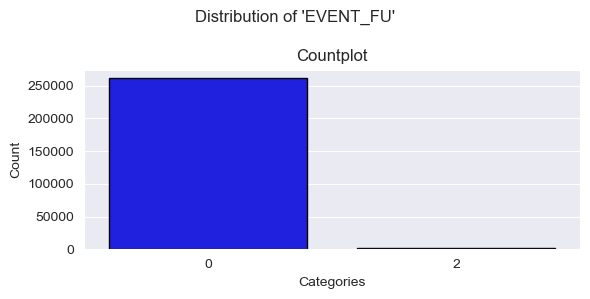

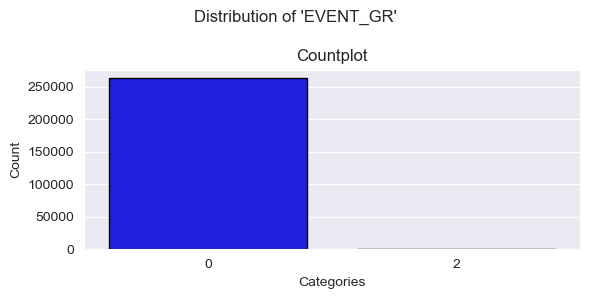

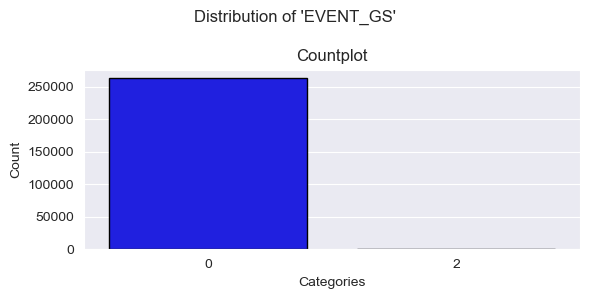

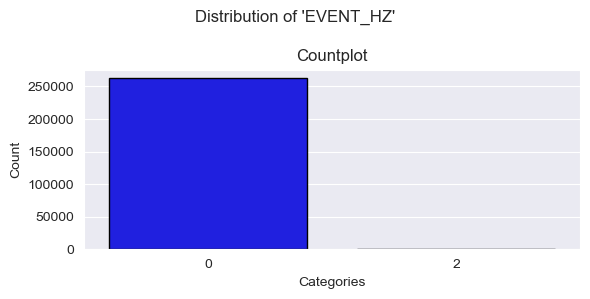

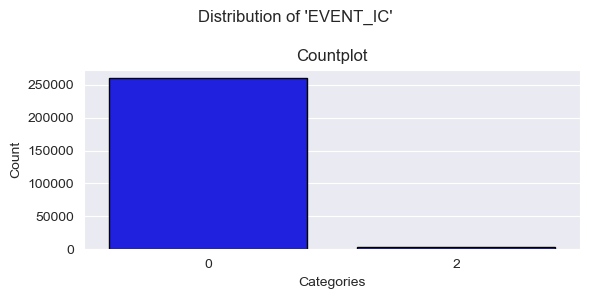

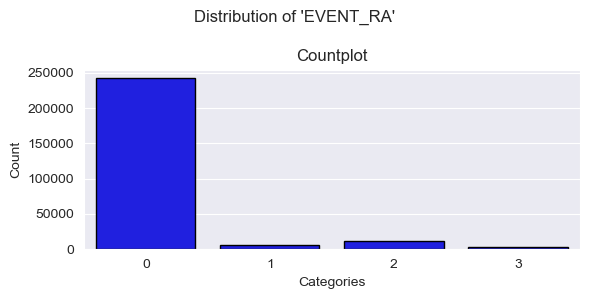

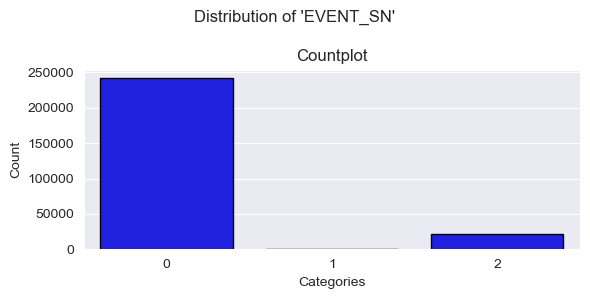

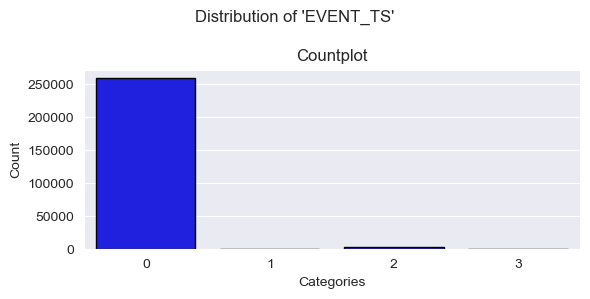

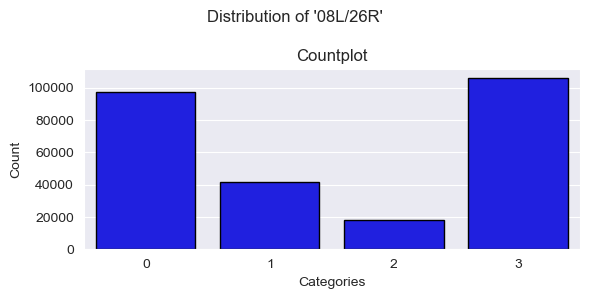

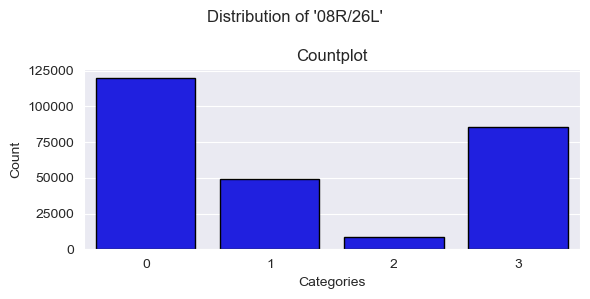

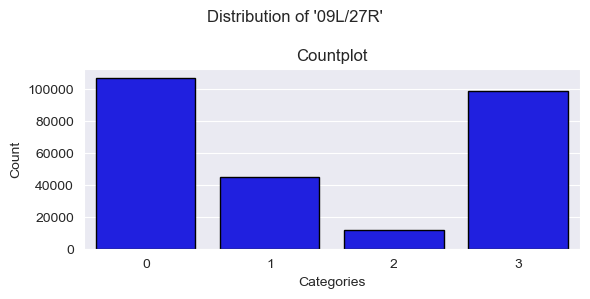

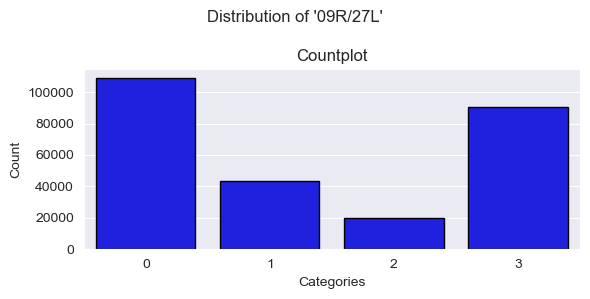

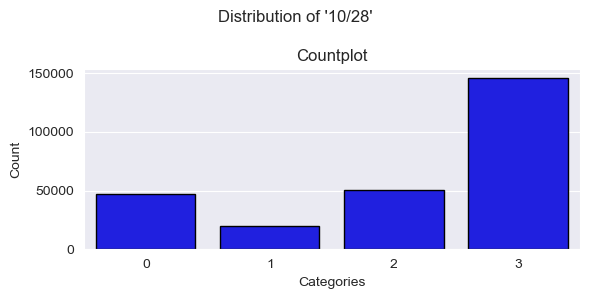

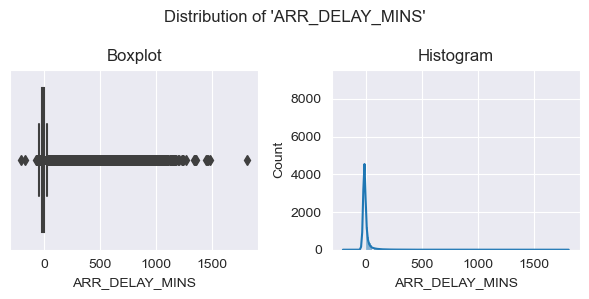

In [42]:
def is_ordinal(series: pd.Series, threshold=5e-5):
    unique_values = series.unique()
    num_unique = len(unique_values)
    
    # Check if the number of unique values is relatively small compared to the total number of values
    if num_unique / len(series) < threshold:
        # Check if the unique values represent ordered categories
        unique_sorted = sorted(unique_values)
        if all(isinstance(val, np.integer)for val in unique_sorted):
            return True
    return False

def plot_column_distribution(series: pd.Series, figsize = (6,3)):
    assert isinstance(series, pd.Series), f"Expected type pd.Series. Got {type(series)}"
    
    if is_ordinal(series):
        fig, ax = plt.subplots(1,1,figsize=figsize)
        sns.countplot(x=series, ax=ax, color="blue", edgecolor="black", linewidth=1)
        plt.title('Countplot')
        plt.xlabel('Categories')
        plt.ylabel('Count')
    else:
        fig, axes = plt.subplots(1, 2, figsize=figsize)
        
        # Plot boxplot
        sns.boxplot(x=series, ax=axes[0])
        axes[0].set_title('Boxplot')
        
        # Plot histogram
        sns.histplot(series, ax=axes[1], kde=True)
        axes[1].set_title('Histogram')

    fig.suptitle(f"Distribution of '{series.name}'", fontsize=12)
    plt.tight_layout()
    plt.show()


for col in train.columns:
    plot_column_distribution(train[col])

In [43]:
lower_bound = -60
upper_bound = +60
print(f"Used lower bound: {lower_bound}\nUsed upper bound: {upper_bound}")
filtered = train[(train["DEP_DELAY(MINS)"] >= lower_bound) & (train["DEP_DELAY(MINS)"] <= upper_bound)].copy()
print(f"Filtered columns: {train.shape[0] - filtered.shape[0]}")
print(f"Leaving DataFrame with shape: {filtered.shape}")

Used lower bound: -60
Used upper bound: 60
Filtered columns: 12325
Leaving DataFrame with shape: (250879, 44)


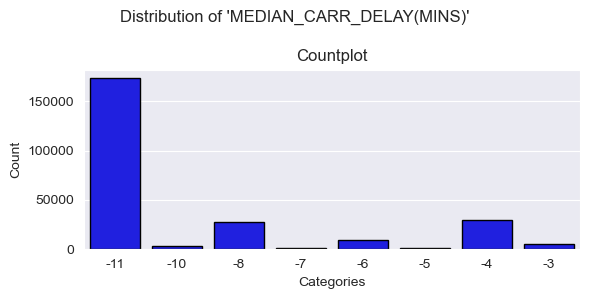

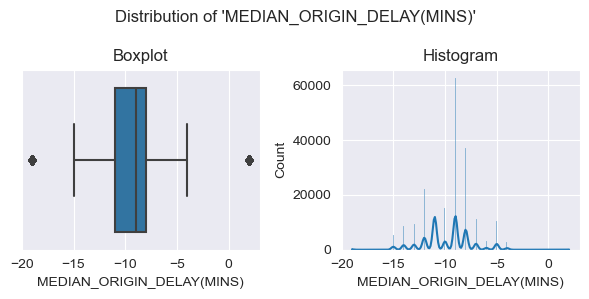

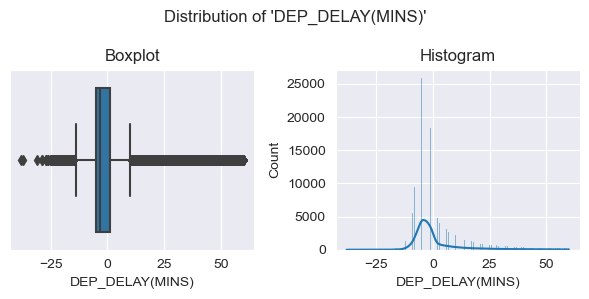

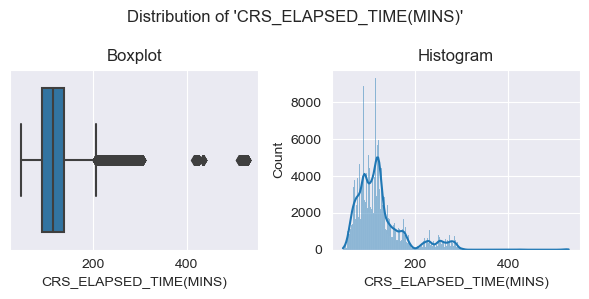

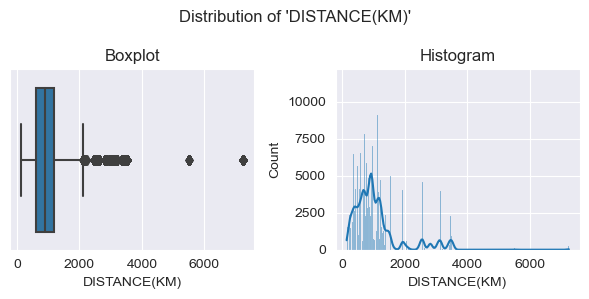

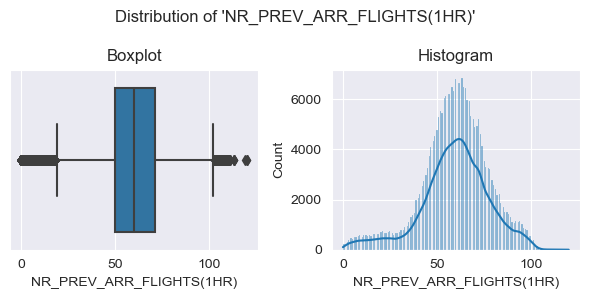

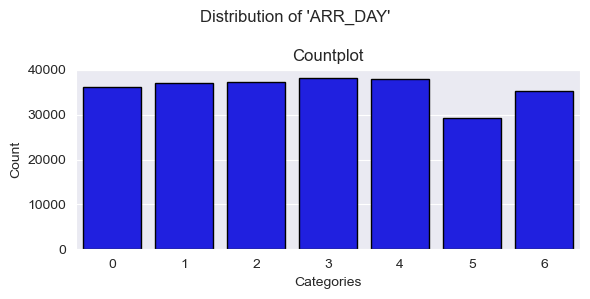

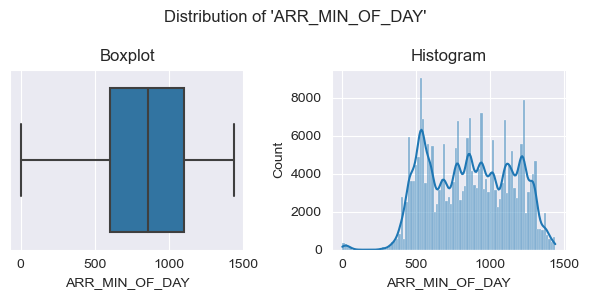

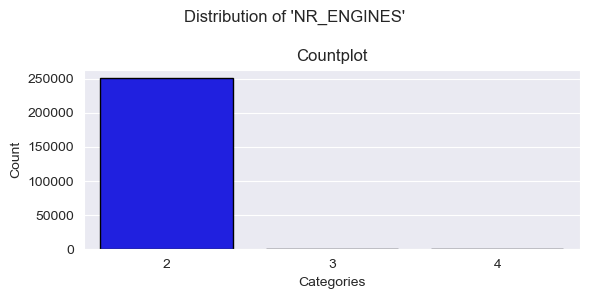

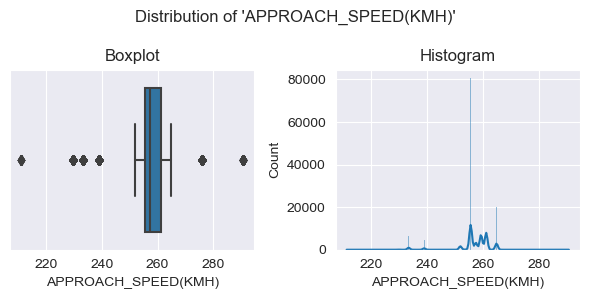

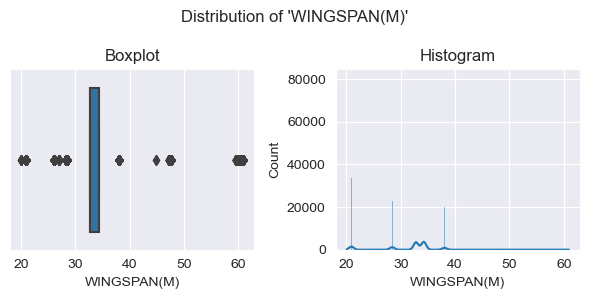

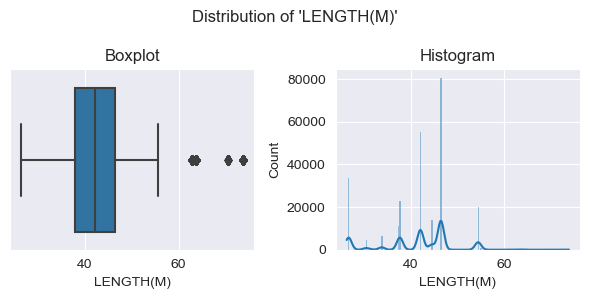

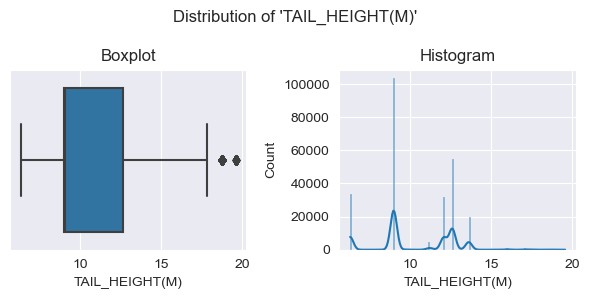

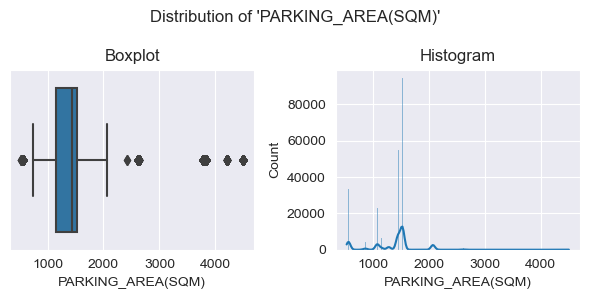

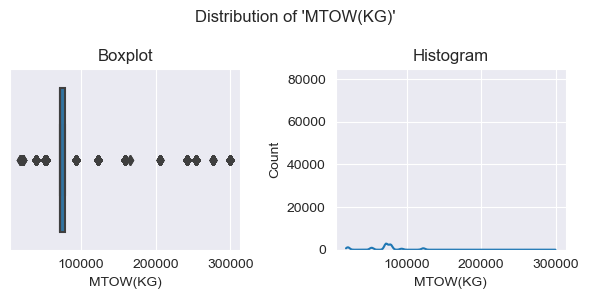

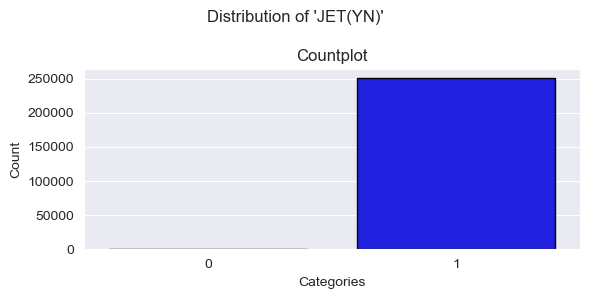

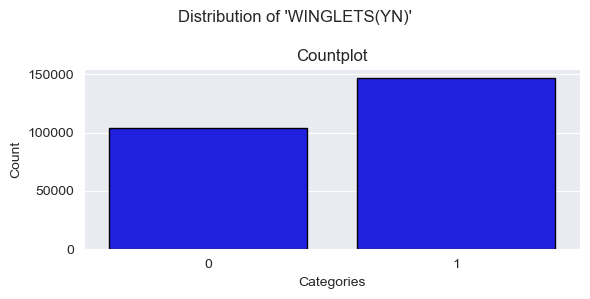

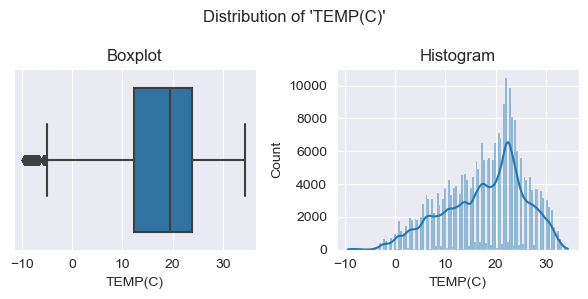

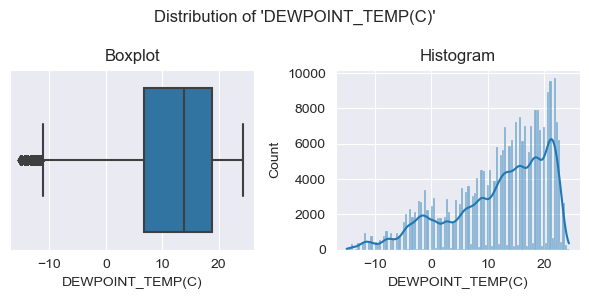

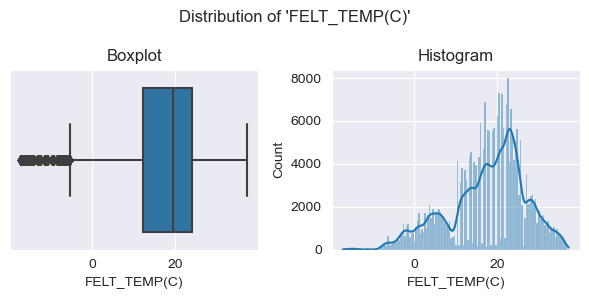

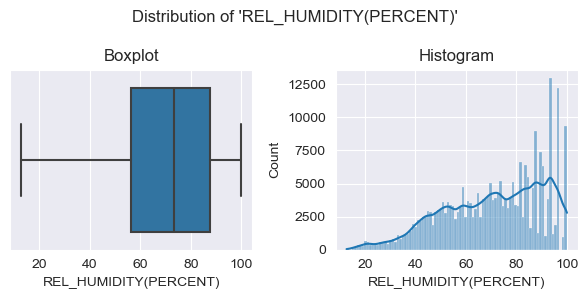

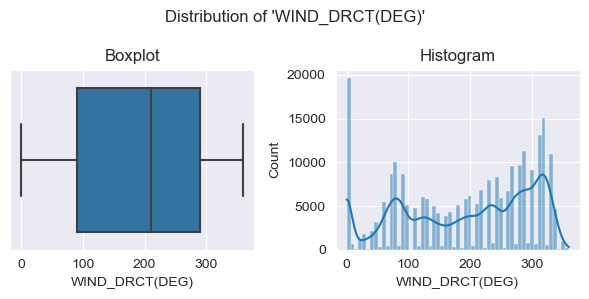

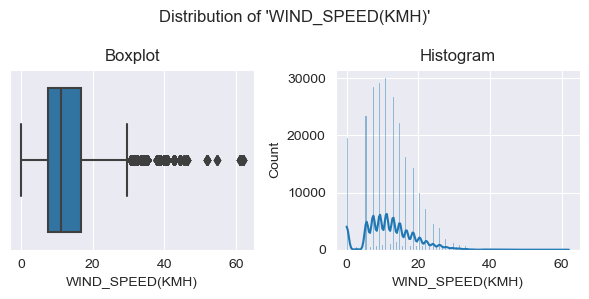

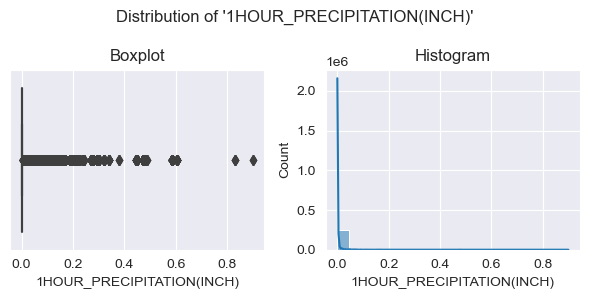

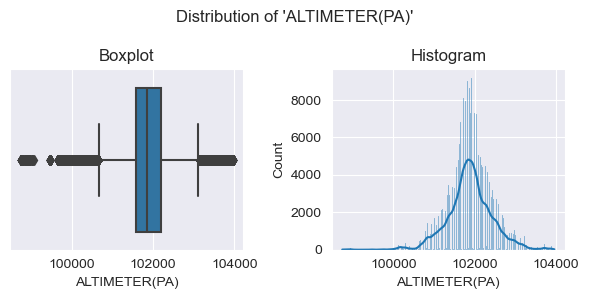

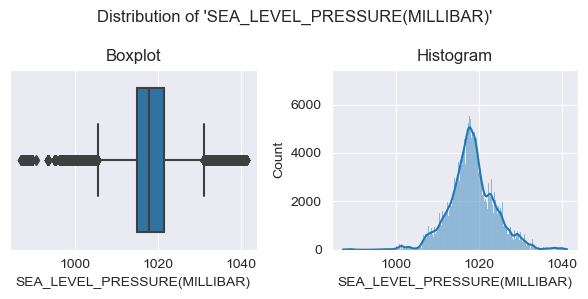

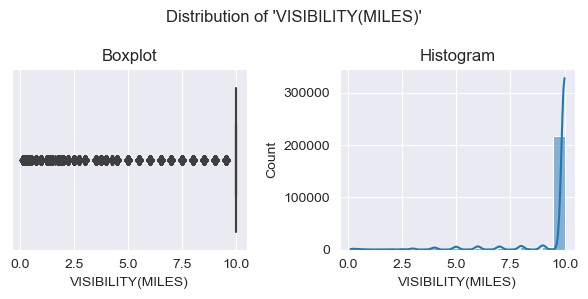

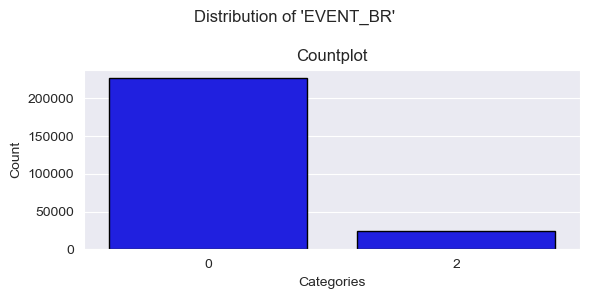

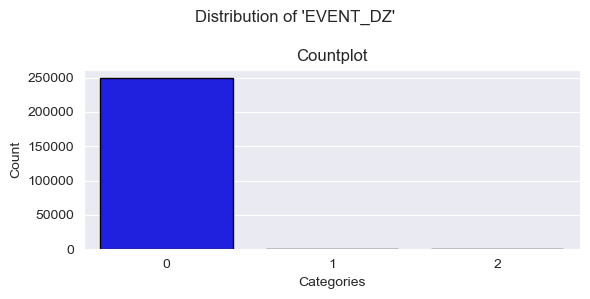

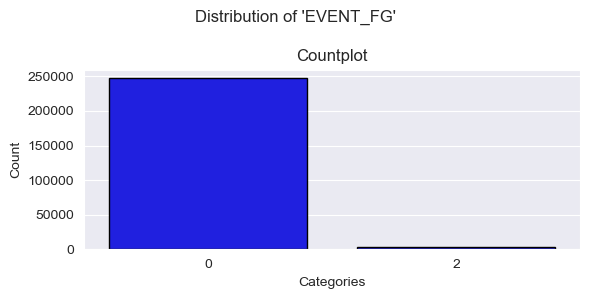

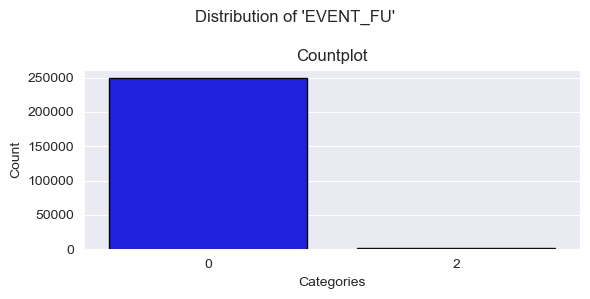

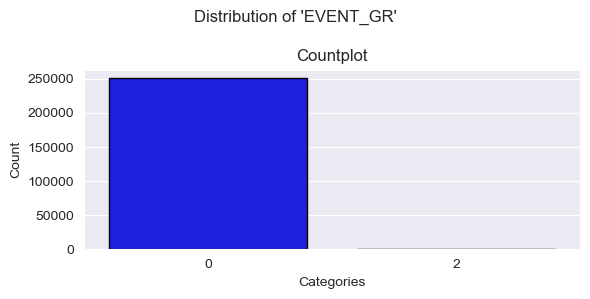

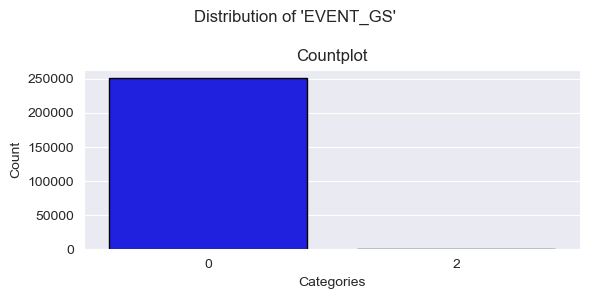

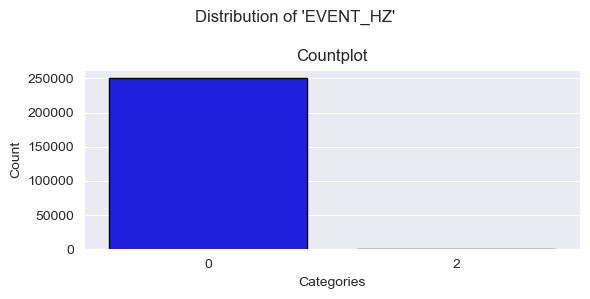

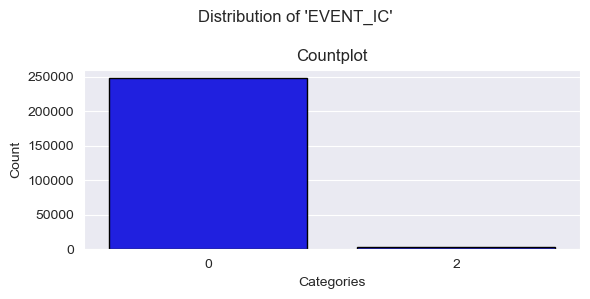

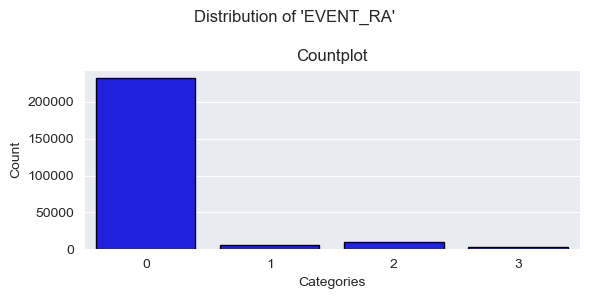

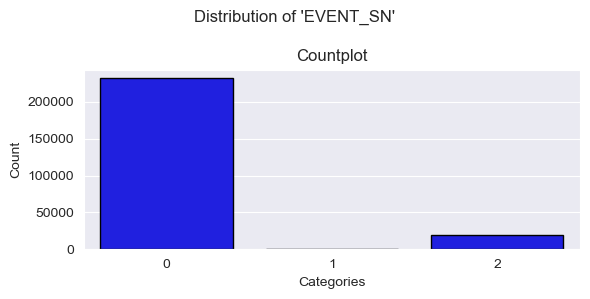

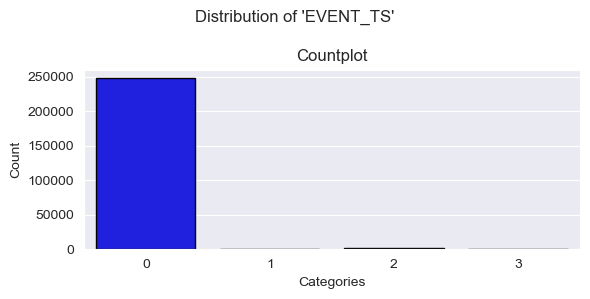

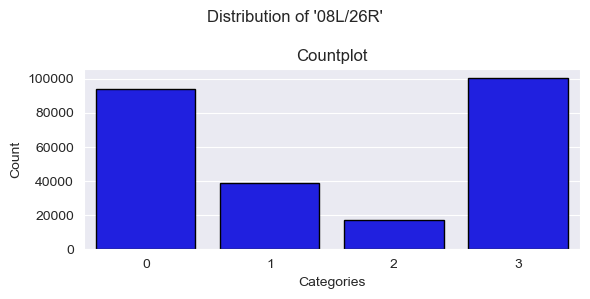

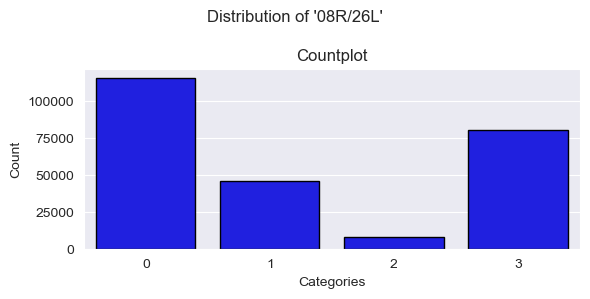

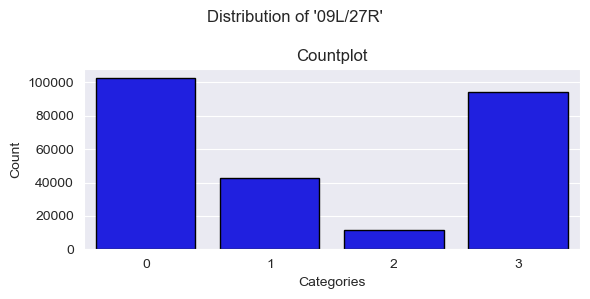

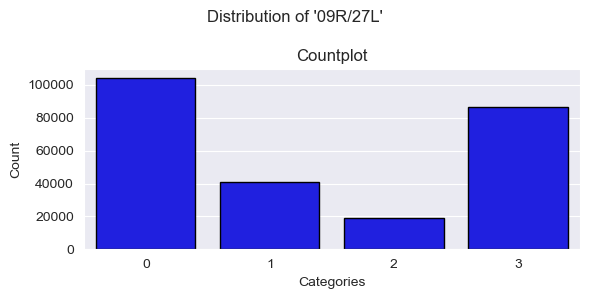

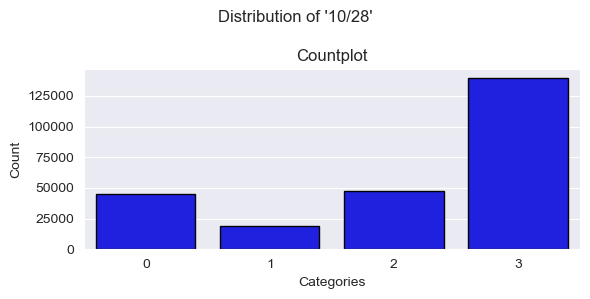

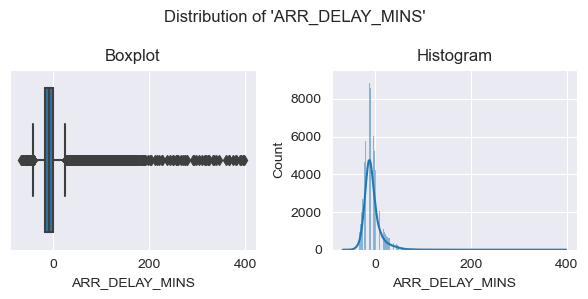

In [44]:
for col in filtered.columns:
    plot_column_distribution(filtered[col])